# Experiment

An experiment that compares the performance of various cache eviction algorithms.

This sample is very simple and has a single test case with minimal data and no analysis. It would attract a low mark.

In [1]:
from memory import Memory
from cache import CyclicCache, LRUCache
import utilities
import random
import math
import numpy as np
import seaborn as sns

## Set up

In [2]:
# Create some memory of size 10.
data = utilities.sample_data(size=100)

# Create implementations of caching with the given data
N = 20
mem = Memory(data)
lru = LRUCache(data, size = N)
cyc = CyclicCache(data, size = N)

## Running the Experiment

My plan is to take 1000 samples of the the hit rate for LRU and cyclic where each gets 1000 random lookups. This will produce a normal distribution of hit rates for each. I will then do this for unbiased and biased random lookups for each of those one with just random and one where values will repeat 1 to 5 times to emulate the process using the same data more than once. The use of a biased random lookups will emulate how some data is accessed more often than other data.

## random data

In [3]:
rnd = [[],[]]
for i in range(1000):
    mem = Memory(data)
    lru = LRUCache(data, size = N)
    cyc = CyclicCache(data, size = N)
    for i in range(1000):
        datum = random.randint(0,99)
        mem.lookup(datum)
        lru.lookup(datum)
        cyc.lookup(datum)
    rnd[0].append(lru.get_memory_hit_count()/mem.get_memory_hit_count())
    rnd[1].append(cyc.get_memory_hit_count()/mem.get_memory_hit_count())

In [4]:
rndWithRepition = [[],[]]
for i in range(1000):
    mem = Memory(data)
    lru = LRUCache(data, size = N)
    cyc = CyclicCache(data, size = N)
    for i in range(1000):
        datum = random.randint(0,99)
        for j in range(random.randint(1,5)):#repeating values
            mem.lookup(datum)
            lru.lookup(datum)
            cyc.lookup(datum)
    rndWithRepition[0].append(lru.get_memory_hit_count()/mem.get_memory_hit_count())
    rndWithRepition[1].append(cyc.get_memory_hit_count()/mem.get_memory_hit_count())

## hit rate for random data

<AxesSubplot:ylabel='Density'>

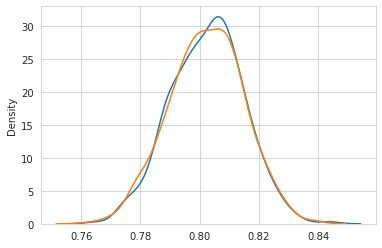

In [5]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(rnd[0]))
sns.kdeplot(np.array(rnd[1]))

<span style="color:blue">-LRU</span>\
<span style="color:orange">-CYC</span>

## hit rate for random data with repetition

<AxesSubplot:ylabel='Density'>

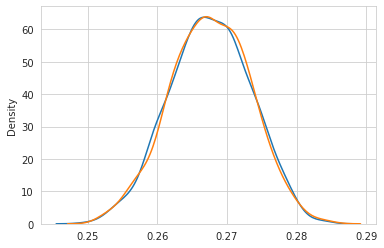

In [6]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(rndWithRepition[0]), label = "LRU")
sns.kdeplot(np.array(rndWithRepition[1]), label = "CYC")

<span style="color:blue">-LRU</span>\
<span style="color:orange">-CYC</span>

here we can see that the difference between lru and cyclic is very minor when dealing with unbiased random data. the hit rates does dramatically improve though once values start repeating but this was expected.

## random data with biase towards center

In [7]:
brnd = [[],[]]
for i in range(1000):
    mem = Memory(data)
    lru = LRUCache(data, size = N)
    cyc = CyclicCache(data, size = N)
    for i in range(1000):
        datum = math.floor((random.randint(0,99) + random.randint(0,99) + random.randint(0,99) + random.randint(0,99)+ random.randint(0,99) + random.randint(0,99)+ random.randint(0,99) + random.randint(0,99)) / 8)
        mem.lookup(datum)
        lru.lookup(datum)
        cyc.lookup(datum)
    brnd[0].append(lru.get_memory_hit_count()/mem.get_memory_hit_count())
    brnd[1].append(cyc.get_memory_hit_count()/mem.get_memory_hit_count())

In [8]:
brndWithRepition = [[],[]]
for i in range(1000):
    mem = Memory(data)
    lru = LRUCache(data, size = N)
    cyc = CyclicCache(data, size = N)
    for i in range(1000):
        datum = math.floor((random.randint(0,99) + random.randint(0,99) + random.randint(0,99) + random.randint(0,99)+ random.randint(0,99) + random.randint(0,99)+ random.randint(0,99) + random.randint(0,99)) / 8)
        for j in range(random.randint(1,5)):#repeating values
            mem.lookup(datum)
            lru.lookup(datum)
            cyc.lookup(datum)
    brndWithRepition[0].append(lru.get_memory_hit_count()/mem.get_memory_hit_count())
    brndWithRepition[1].append(cyc.get_memory_hit_count()/mem.get_memory_hit_count())

## hit rate for random data

<AxesSubplot:ylabel='Density'>

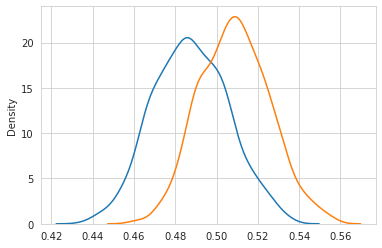

In [9]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(brnd[0]), label = "LRU")
sns.kdeplot(np.array(brnd[1]), label = "CYC")

<span style="color:blue">-LRU</span>\
<span style="color:orange">-CYC</span>

## hit rate for random data with repetition

<AxesSubplot:ylabel='Density'>

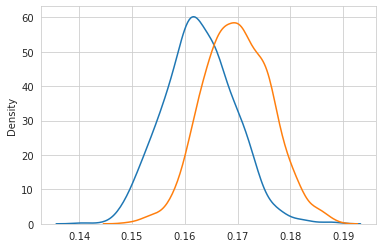

In [10]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(brndWithRepition[0]), label = "LRU")
sns.kdeplot(np.array(brndWithRepition[1]), label = "CYC")

<span style="color:blue">-LRU</span>\
<span style="color:orange">-CYC</span>

Again we see a dramatic improvement between that of repition and no repition but we also see a difference between LRU and cyclic as well with LRU having better hit rate.

## Conclusions

when data is repeated consecutively neither LRU or the cyclic approaches seem to be favoured.\
The same can be said when the data being looked up is unbiased random. So in a system where data is being randomly looked up and no single data is more likely to be looked up than another then neither cyclic or LRU have the advantage. That being said Cyclic is a less complex aproach and therefore would probably be the best fit.\
There is a difference between cyclic and LRU when the random data being looked up is biased. When certain data is more likely to be picked than other data then the LRU approach is better as memory hit rate is lower.\
\
In conclusion the LRU approach appears to be the best option as worse case there is very little difference between it and cyclic and in a more realistic scenario where data is lookup is random but biased then LRU is a clear winner.